# CLUSTERING THE MILITARY POWERS OF COUNTRIES

Bu proje, ülkelerin askeri güçlerini analiz etmek ve benzer yeteneklere sahip olanları gruplamak için bir kümeleme yaklaşımını kullanarak, uluslararası ilişkiler ve güvenlik stratejileri açısından önemli bir bakış sunmayı amaçlamaktadır.



In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_excel('World military power.xlsx')

In [3]:
df

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Venezuela,0.6449,Venezuela,260,Venezuela,38,Venezuela,0,Venezuela,52,...,Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800,Venezuela,7100,Venezuela,5267
135,Vietnam,0.3559,Vietnam,293,Vietnam,77,Vietnam,0,Vietnam,38,...,Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444,Vietnam,17702,Vietnam,4616
136,Yemen,1.2412,Yemen,169,Yemen,77,Yemen,0,Yemen,8,...,Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906,Yemen,0,Yemen,1601
137,Zambia,1.6464,Zambia,108,Zambia,18,Zambia,0,Zambia,11,...,Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250,Zambia,6043


In [4]:
df.columns = df.iloc[0]
df = df[1:]
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
5,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968


In [5]:
pd.set_option('display.max_columns', 60)

In [6]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
5,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49,Argentina,0,Argentina,2,Argentina,4,Argentina,0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968


In [7]:
y=df['Military Strength']

In [8]:
df=df[df.columns[1::2]]

In [9]:
df

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0,0,0,0,0,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38,0,0,0,0,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201,0,6,0,5,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57,0,0,0,0,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
5,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49,0,2,4,0,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.6449,260,38,0,52,82,86,10,390,600,73,104,36,49,0,2,0,4,"74,50,00,000","1,00,30,00,00,000",444,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100,5267
135,0.3559,293,77,0,38,36,138,25,2615,2530,70,1000,85,65,0,6,0,9,"5,50,00,00,000","96,58,00,00,000",45,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702,4616
136,1.2412,169,77,0,8,21,61,14,620,615,20,85,150,30,0,0,0,0,"1,40,00,00,000","7,06,80,00,000",57,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0,1601
137,1.6464,108,18,0,11,52,27,0,75,184,0,42,50,0,0,0,0,0,"4,00,00,000","11,66,00,00,000",88,0,21000,0,"61,66,905","1,64,45,079","7,52,618",NaN,2250,6043


In [10]:
df.isnull().sum().sort_values(ascending=False)

0
Total Coastline Coverage value             29
Submarine Fleet Strength value             23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Aircraft Carrier Fleet Strength value      23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Attack Helicopter Fleet Strength value      0
External Debt value                         0
Total Waterway Coverage value               0
Fighter/Interceptor Strength value          0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
defense spending budget value               0
Tank Strength value                         0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strengt

In [11]:
df['Total Coastline Coverage value'].value_counts()

Total Coastline Coverage value
853     2
193     2
225     2
26      2
400     2
       ..
2389    1
310     1
885     1
4853    1
1906    1
Name: count, Length: 104, dtype: int64

In [12]:
df['Aircraft Carrier Fleet Strength value'].value_counts()

Aircraft Carrier Fleet Strength value
0     102
2       6
1       4
4       2
20      1
Name: count, dtype: int64

In [13]:
df['Frigate Fleet Strength value'].value_counts()

Frigate Fleet Strength value
0     61
2      8
7      6
4      6
1      5
9      4
5      3
11     3
13     3
6      3
3      3
8      2
12     2
10     2
22     1
52     1
18     1
16     1
Name: count, dtype: int64

In [14]:
df['Destroyer Fleet Strength value'].value_counts()

Destroyer Fleet Strength value
0     103
4       3
2       1
36      1
11      1
10      1
40      1
16      1
12      1
6       1
91      1
Name: count, dtype: int64

In [15]:
df['Submarine Fleet Strength value'].value_counts()

Submarine Fleet Strength value
0     74
2      6
6      6
4      5
5      4
8      3
3      3
11     2
83     1
10     1
12     1
22     1
62     1
34     1
1      1
20     1
16     1
9      1
74     1
66     1
Name: count, dtype: int64

In [16]:
df['Navy Fleet Strengths value'].value_counts()

Navy Fleet Strengths value
0      14
8       5
19      4
20      4
30      3
       ..
37      1
15      1
36      1
39      1
490     1
Name: count, Length: 78, dtype: int64

In [17]:
df = df.replace(',', '', regex=True)

In [18]:
df['Total Border Coverage value'].fillna(0)
df['Aircraft Carrier Fleet Strength value'].fillna(0)
df['Frigate Fleet Strength value'].fillna(0)
df['Destroyer Fleet Strength value'].fillna(0)
df['Submarine Fleet Strength value'].fillna(0)
df['Navy Fleet Strengths value'].fillna(0)

1        0.0
2       38.0
3      201.0
4       57.0
5       49.0
       ...  
134     49.0
135     65.0
136     30.0
137      0.0
138      0.0
Name: Navy Fleet Strengths value, Length: 138, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value  138 non-n

In [20]:
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    df[col] = df[col].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value  138 non-n

In [22]:
df.fillna(df.astype(float).mean(),inplace=True)

In [23]:
df.isnull().sum()

0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Production value                       0
Oil Cons

In [24]:
#df=pd.concat([y,df],axis=1)

In [25]:
x=df

In [26]:
#wcss=within cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.9227153206136329
0.899544295036163
0.8671436271439986
0.867519554074611
0.7789462745536548
0.78179475464277
0.7847423623940257
0.6833747949746672


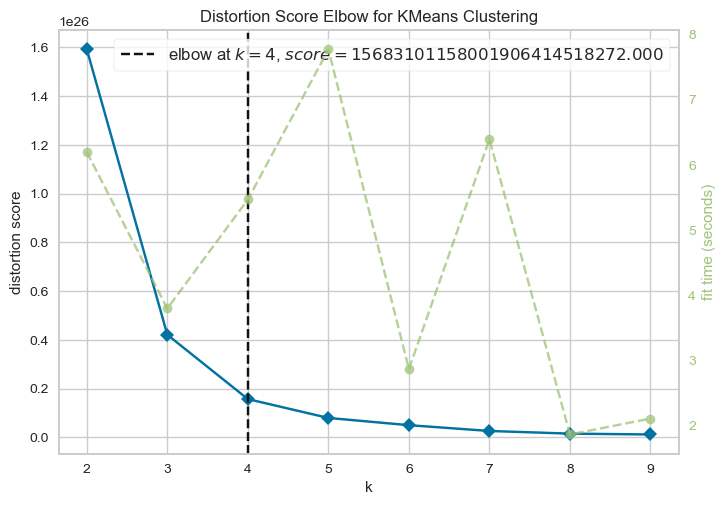

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10)) 
vis.fit(x)
vis.show()

In [28]:
model=KMeans(4)
model=model.fit(x)
tahmin=model.predict(x)
tahmin

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [29]:
x['cluster']=tahmin
x.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster
1,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0,0
2,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0,0
3,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0,0
4,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0,0
5,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0,0


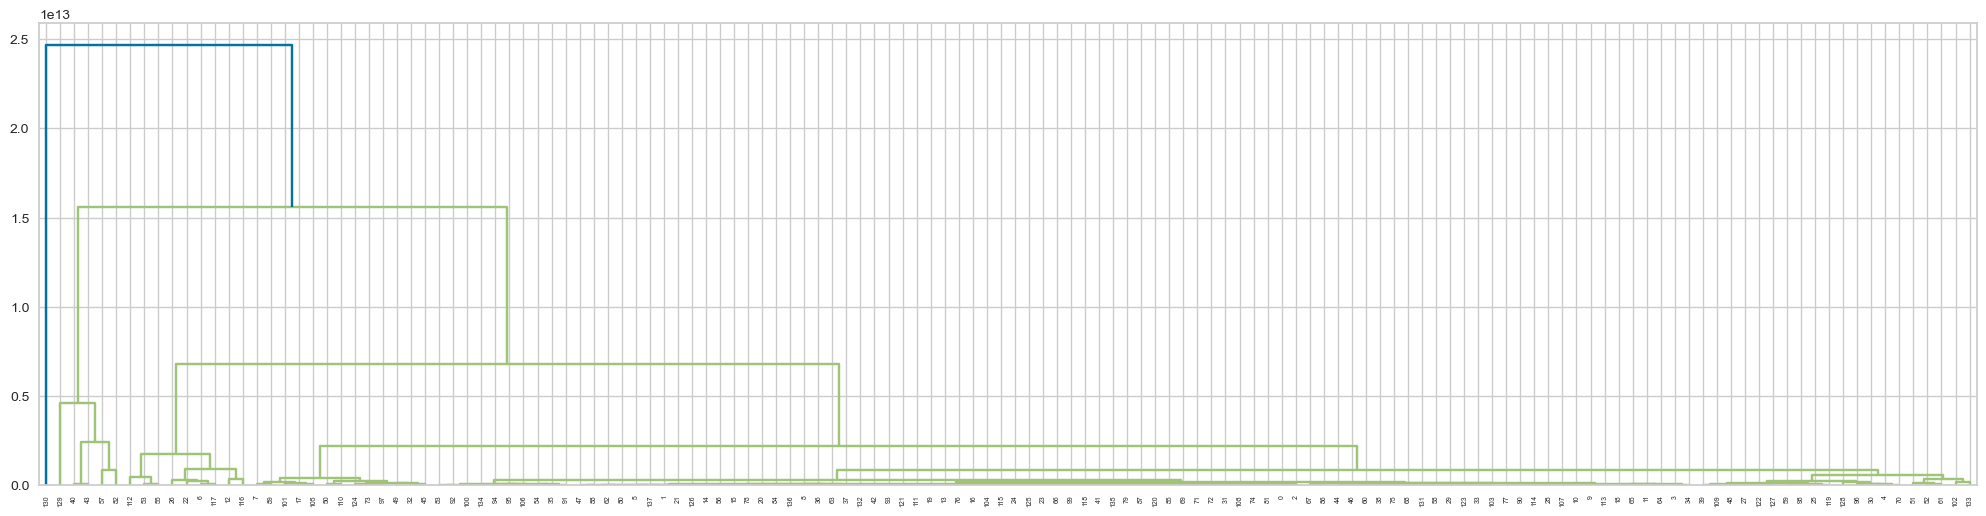

In [30]:
data=linkage(x,method='ward',metric='euclidean')
plt.figure(figsize=(25,6))
dendrogram(data);

In [31]:
x['Country']=y

In [32]:
x[x['cluster']==1]

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,cluster,Country
131,0.0606,13264,2085,715,945,2643,5768,967,6289,39253,1465,2740,1366,490.0,20.0,66.0,91.0,0.0,7.500000e+11,1.791000e+13,13513,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,9826675.0,19924.0,41009.0,12048.0,1,United States


In [33]:
x.groupby('cluster')['Country'].unique()

cluster
0    [Afghanistan, Albania, Algeria, Angola, Argent...
1                                      [United States]
2       [France, Germany, Netherlands, United Kingdom]
3    [Australia, Belgium, Canada, China, Ireland, I...
Name: Country, dtype: object

In [34]:
x.columns=(x.columns).str.replace(' ', '_', regex=True)
x

,Military_Strength_Power_Index,Aircraft_Strength_value,Fighter/Interceptor_Strength_value,Attack_Aircraft_Strength_value,Transport_Aircraft_Fleet_Strength_value,Trainer_Aircraft_Fleet_value,Helicopter_Fleet_Strength_value,Attack_Helicopter_Fleet_Strength_value,Tank_Strength_value,AFV/APC_Strength_value,Self-Propelled_Artillery_Strength_value,Towed_Artillery_Strength_value,Rocket_Projector_Strength_value,Navy_Fleet_Strengths_value,Aircraft_Carrier_Fleet_Strength_value,Submarine_Fleet_Strength_value,Destroyer_Fleet_Strength_value,Frigate_Fleet_Strength_value,defense_spending_budget_value,External_Debt_value,Airport_Totals_value,Oil_Production_value,Oil_Consumption_value,Proven_Oil_Reserves_value,Available_Manpower_value,Total_Population_value,Total_Square_Land_Area_value,Total_Coastline_Coverage_value,Total_Waterway_Coverage_value,Total_Border_Coverage_value,cluster,Country
1,1.3444,260,0,25,30,0,187,0,0,1062,0,176,50,0.0,0.0,0.0,0.0,0.0,1.200000e+10,2.840000e+09,43,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.000000,1200.0,5987.0,0,Afghanistan
2,2.3137,19,0,0,0,0,19,0,0,467,0,0,0,38.0,0.0,0.0,0.0,0.0,2.500000e+08,9.505000e+09,4,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.000000,41.0,691.0,0,Albania
3,0.4659,551,103,22,59,87,257,45,880,7361,320,240,316,201.0,0.0,6.0,0.0,5.0,1.300000e+10,6.260000e+09,157,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.000000,0.0,6734.0,0,Algeria
4,0.8379,295,72,18,30,47,126,15,379,595,28,357,115,57.0,0.0,0.0,0.0,0.0,7.000000e+09,4.208000e+10,176,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.000000,1300.0,5369.0,0,Angola
5,0.6521,227,24,7,9,64,100,0,370,739,83,172,26,49.0,0.0,2.0,4.0,0.0,4.200000e+09,2.149000e+11,1138,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.000000,11000.0,11968.0,0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.6449,260,38,0,52,82,86,10,390,600,73,104,36,49.0,0.0,2.0,0.0,4.0,7.450000e+08,1.003000e+11,444,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,912050.0,2800.000000,7100.0,5267.0,0,Venezuela
135,0.3559,293,77,0,38,36,138,25,2615,2530,70,1000,85,65.0,0.0,6.0,0.0,9.0,5.500000e+09,9.658000e+10,45,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,331210.0,3444.000000,17702.0,4616.0,0,Vietnam
136,1.2412,169,77,0,8,21,61,14,620,615,20,85,150,30.0,0.0,0.0,0.0,0.0,1.400000e+09,7.068000e+09,57,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,527968.0,1906.000000,0.0,1601.0,0,Yemen
137,1.6464,108,18,0,11,52,27,0,75,184,0,42,50,0.0,0.0,0.0,0.0,0.0,4.000000e+07,1.166000e+10,88,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,752618.0,6171.330275,2250.0,6043.0,0,Zambia


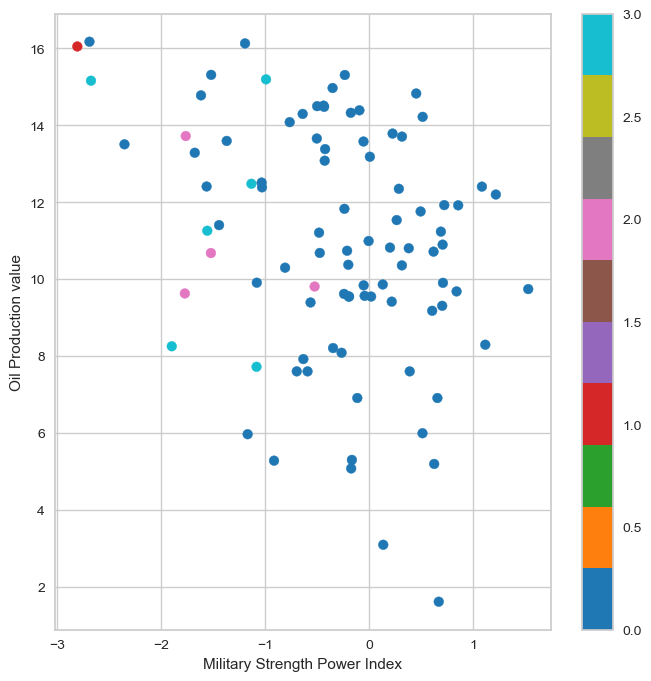

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(np.log(x.Military_Strength_Power_Index),np.log(x.Oil_Production_value),c=tahmin,cmap='tab10')
plt.colorbar()
plt.xlabel('Military Strength Power Index')
plt.ylabel('Oil Production value')
plt.show()

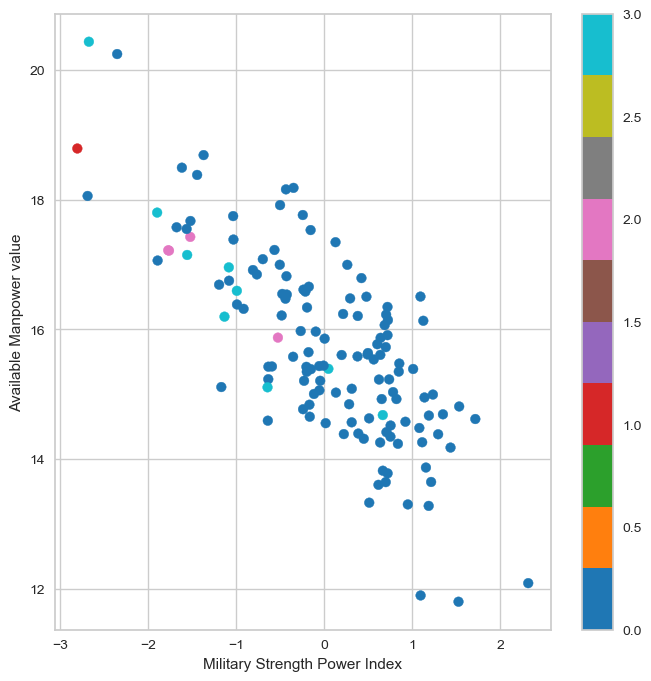

In [36]:
plt.figure(figsize=(8,8))
plt.scatter(np.log(x.Military_Strength_Power_Index),np.log(x.Available_Manpower_value),c=tahmin,cmap='tab10')
plt.colorbar()
plt.xlabel('Military Strength Power Index')
plt.ylabel('Available Manpower value')
plt.show()